In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
storedata = pd.read_csv(r'stores.csv')
featuresdata = pd.read_csv(r'features.csv')
traindata = pd.read_csv(r'train.csv')

In [3]:
storedata.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
featuresdata.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
traindata.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
data = pd.merge(featuresdata, traindata, on = ['Store','Date'] ,how= 'inner')

In [7]:
data = pd.merge(data,storedata , on = ['Store'],how = 'inner')

In [8]:
data.drop(columns=['IsHoliday_x'],inplace=True)

In [9]:
data.rename(columns={'IsHoliday_y':'IsHoliday'}, inplace=True)

In [10]:
# data.MarkDown2.unique()
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221


In [11]:
c = data.columns
c.to_list()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Dept',
 'Weekly_Sales',
 'IsHoliday',
 'Type',
 'Size']

In [12]:
# data['Date'] = pd.to_datetime(data['Date'],format='%y-%m-%d')
# data['Date']
# data.info()

In [13]:
data['Date'] = data["Date"].apply(lambda x : x[2:])

In [14]:
data['Date'] = pd.to_datetime(data['Date'],format='%y-%m-%d')
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221


In [15]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [16]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315,2010,2
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315,2010,2
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315,2010,2
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315,2010,2
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221,2012,10


In [17]:
data2 = data.drop(columns= ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date'])

In [18]:
data2.duplicated().any()

False

In [19]:
### data2['Temperature'] = data2['Temperature'].astype(int)
data2['CPI'] = data2['CPI'].astype(int)
data2['Weekly_Sales'] = data2['Weekly_Sales'].astype(int)
data2['Unemployment'] = data2['Unemployment'].astype(int)
data2['Fuel_Price'] = data2['Fuel_Price'].astype(int)

data2


,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,42.31,2,211,8,1,24924,False,A,151315,2010,2
1,1,42.31,2,211,8,2,50605,False,A,151315,2010,2
2,1,42.31,2,211,8,3,13740,False,A,151315,2010,2
3,1,42.31,2,211,8,4,39954,False,A,151315,2010,2
4,1,42.31,2,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3,192,8,93,2487,False,B,118221,2012,10
421566,45,58.85,3,192,8,94,5203,False,B,118221,2012,10
421567,45,58.85,3,192,8,95,56017,False,B,118221,2012,10
421568,45,58.85,3,192,8,97,6817,False,B,118221,2012,10


In [20]:
# dropping -ve values of weekly sales data form dataset 
data2 = data2.loc[data2['Weekly_Sales']>0]

In [21]:
data2

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,42.31,2,211,8,1,24924,False,A,151315,2010,2
1,1,42.31,2,211,8,2,50605,False,A,151315,2010,2
2,1,42.31,2,211,8,3,13740,False,A,151315,2010,2
3,1,42.31,2,211,8,4,39954,False,A,151315,2010,2
4,1,42.31,2,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3,192,8,93,2487,False,B,118221,2012,10
421566,45,58.85,3,192,8,94,5203,False,B,118221,2012,10
421567,45,58.85,3,192,8,95,56017,False,B,118221,2012,10
421568,45,58.85,3,192,8,97,6817,False,B,118221,2012,10


# Effect of Temp 

<AxesSubplot: xlabel='Temperature'>

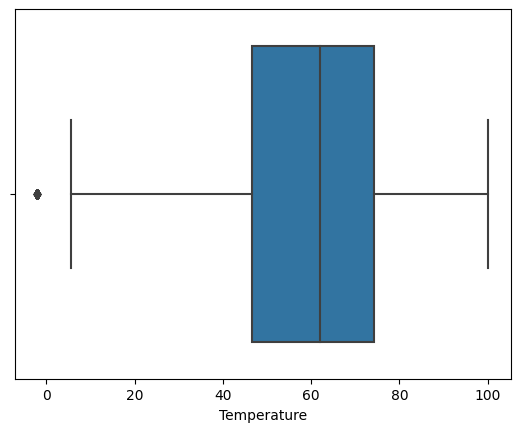

In [22]:
data2['Temperature'].unique().size
# sns.histplot(y = 'Weekly_Sales', x = 'Temperature', bins=[-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,100],data = data2)
# sns.scatterplot(y = 'Weekly_Sales', x = 'Temperature',data = data2)
sns.boxplot(x = 'Temperature', data  = data2)

<AxesSubplot: xlabel='Temperature'>

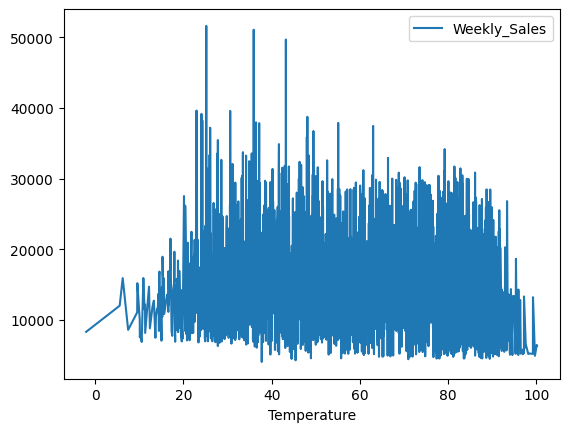

In [29]:
# sns.scatterplot(y = 'Weekly_Sales', x = 'Temperature',data = data2)
temp = pd.pivot_table(data2, values = "Weekly_Sales", index= "Temperature")
temp.plot()
# plt.ylim(0,70000)


In [36]:
# data2[data2['Temperature']<=18]['Weekly_Sales'].sum()
data2['Weekly_Sales'].sum()

6737108729

<AxesSubplot: xlabel='Temperature', ylabel='Weekly_Sales'>

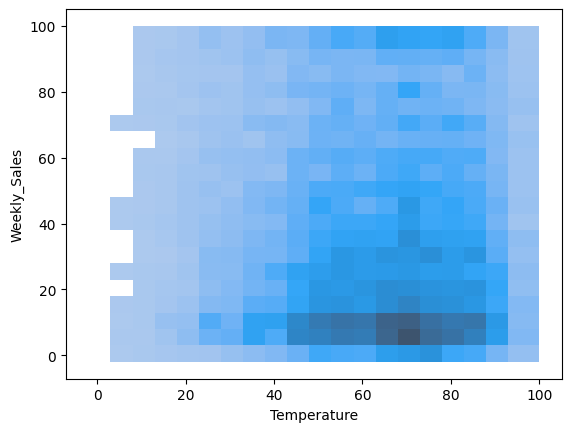

In [24]:
sns.histplot(y = 'Weekly_Sales', x = 'Temperature',bins=[-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,100],data = data2)

<AxesSubplot: xlabel='Weekly_Sales'>

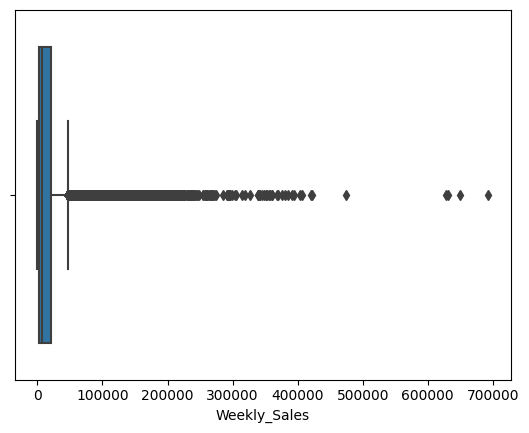

In [25]:
sns.boxplot(x = 'Weekly_Sales',data = data2)

In [26]:
# data2[data2['Weekly_Sales']==693099]
data2.Weekly_Sales.min()

1

In [27]:
data2.corr()

C:\Users\Parn\AppData\Local\Temp\ipykernel_3748\1981098430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Size,year,month
Store,1.000000,-0.050265,0.047056,-0.211231,0.207313,0.024411,-0.085108,-0.000517,-0.182725,0.002666,0.000861
Temperature,-0.050265,1.000000,0.058076,0.183502,0.083923,0.004612,-0.001741,-0.155840,-0.058640,0.065226,0.235979
Fuel_Price,0.047056,0.058076,1.000000,-0.142106,0.004264,0.004495,0.001429,-0.024738,-0.007518,0.722305,-0.026666
CPI,-0.211231,0.183502,-0.142106,1.000000,-0.295284,-0.007329,-0.021062,-0.001822,-0.003984,0.074692,0.005281
Unemployment,0.207313,0.083923,0.004264,-0.295284,1.000000,0.008130,-0.025680,0.013658,-0.065781,-0.249281,-0.009734
Dept,0.024411,0.004612,0.004495,-0.007329,0.008130,1.000000,0.149233,0.000533,-0.002851,0.003166,0.000520
Weekly_Sales,-0.085108,-0.001741,0.001429,-0.021062,-0.025680,0.149233,1.000000,0.012711,0.244444,-0.009664,0.028410
IsHoliday,-0.000517,-0.155840,-0.024738,-0.001822,0.013658,0.000533,0.012711,1.000000,0.000834,-0.056549,0.123009
Size,-0.182725,-0.058640,-0.007518,-0.003984,-0.065781,-0.002851,0.244444,0.000834,1.000000,-0.004871,-0.001149
year,0.002666,0.065226,0.722305,0.074692,-0.249281,0.003166,-0.009664,-0.056549,-0.004871,1.000000,-0.194609


array([211, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 209, 224, 225, 226, 126, 127, 128, 129, 130, 131, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 227, 181, 182, 183,
       184, 185, 186, 187, 188, 132, 133, 134, 135, 136, 137, 138, 204,
       203, 205, 206, 207, 208, 139, 140, 141, 142, 202])